# Data-PreProcessing

  Importing necessary Libraries

In [ ]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from numpy.random import seed  # Set seeds to make the experiment more reproducible.
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

Reading input data

In [ ]:
# path='https://drive.google.com/drive/u/0/folders/1DcZOvmmLqxGESpeqc5RcpAZYGY4mI1Dq'
train_data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Test_set.xlsx')

train_data.head()
# train_data.shape #(10683, 11)
# train_data.info()

train_data.dropna(inplace=True)
# train_data.info()
# X = 
# y =

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Checking for Null Values

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Converting Date_of_Journey feature into readable format by seperating day and month using python datetime library and Dropping the unreadable  column

In [ ]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

train_data.head()

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

Converting Dep_Time feature into readable format by seperating hour and minute using python datetime library and Dropping the unreadable column

In [ ]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

train_data.drop(["Dep_Time"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Converting Arrival_Time feature into readable format by seperating hour and minute using python datetime library and Dropping the unreadable column

In [ ]:
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Convertinng the "Duration" feature column into readable format by applying string operations seperating hours and minutes columns and then dropping unreadable duration column

In [ ]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

train_data.drop(["Duration"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Count of each airline flights in dataset

In [ ]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Visualizing prices for different airlines

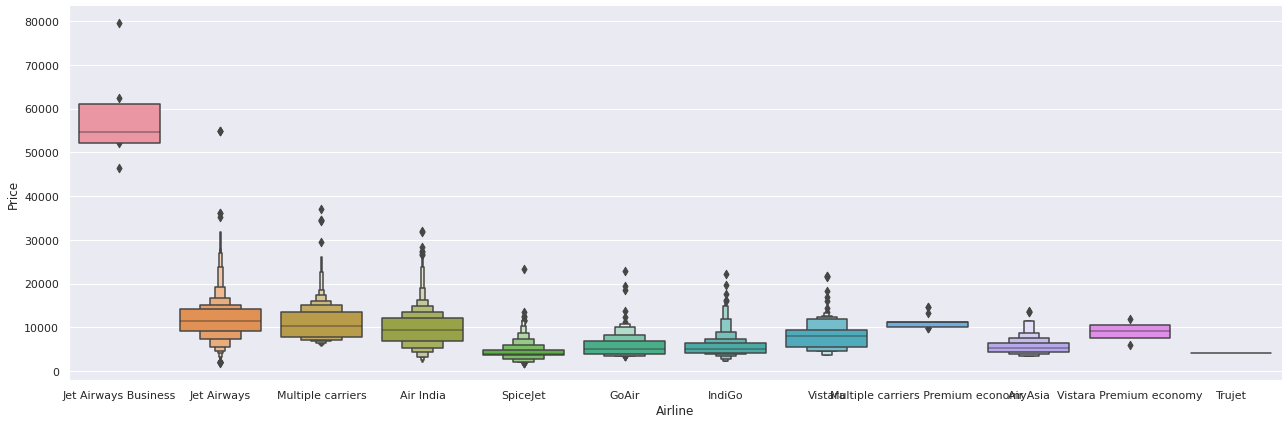

In [ ]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Counts of different Destination

In [ ]:
train_data["Airline"].value_counts()
train_data["Source"].value_counts()
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Converting Categorical Variables to numerical form using OneHotEncoding

In [ ]:
# onehotencoding to convert categorical into numerical
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True) 

Airline.head(10)


Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Source.head()


Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True) 

Destination.head(10)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,1,0,0,0,0


Analyzing the data, we notice that the Additional_Info column has mostly no information. We decide to drop it.

In [ ]:
# Analyzing the data, we notiuce that the Additional_Info column has mostly no information. We decide to drop it.
# Also we notice that the Route and the Total_stops are strongly correlated. We chose to keep Total_Stops and drop Route.

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Converting the data in Stops column into numerical form 

In [ ]:
# encoding the strings directly to numerical form without using encoding !

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


Concatenating all the changes and forming new, updated dataframe

In [ ]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

data_train.head()


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(data_train.shape)
train_data.shape

(10682, 30)


(10682, 13)

All the Steps done above for Train data are now performed for Test data !

In [ ]:
# coming to the test data part, we wil apply the same data preprocessing that we did in train part

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# # Concatenate dataframe --> test_data + Airline + Source + Destination
# data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

# data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

# print()
# print()

# print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

Updated test data frame after data pre-processing

In [ ]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

Visualizing Test Data

In [ ]:
data_test.head(10)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,12,6,18,15,12,35,18,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6,1,12,3,7,30,22,35,15,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,15,3,10,10,12,55,2,45,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,1,18,5,16,30,22,35,6,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Splitting the dataset

In [ ]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour','Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours','Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo','Airline_Jet Airways', 'Airline_Jet Airways Business','Airline_Multiple carriers','Airline_Multiple carriers Premium economy', 'Airline_SpiceJet','Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy','Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai','Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad','Destination_Kolkata', 'Destination_New Delhi']]
y = data_train.iloc[:, 1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train1 = X_train.iloc[:1000,:]
y_train1 = y_train.iloc[:1000]
X_test1 = X_test.iloc[:1000,:]
y_test1 = y_test.iloc[:1000]
# y_train.shape

# Finding for correlation and Heat Map visualization

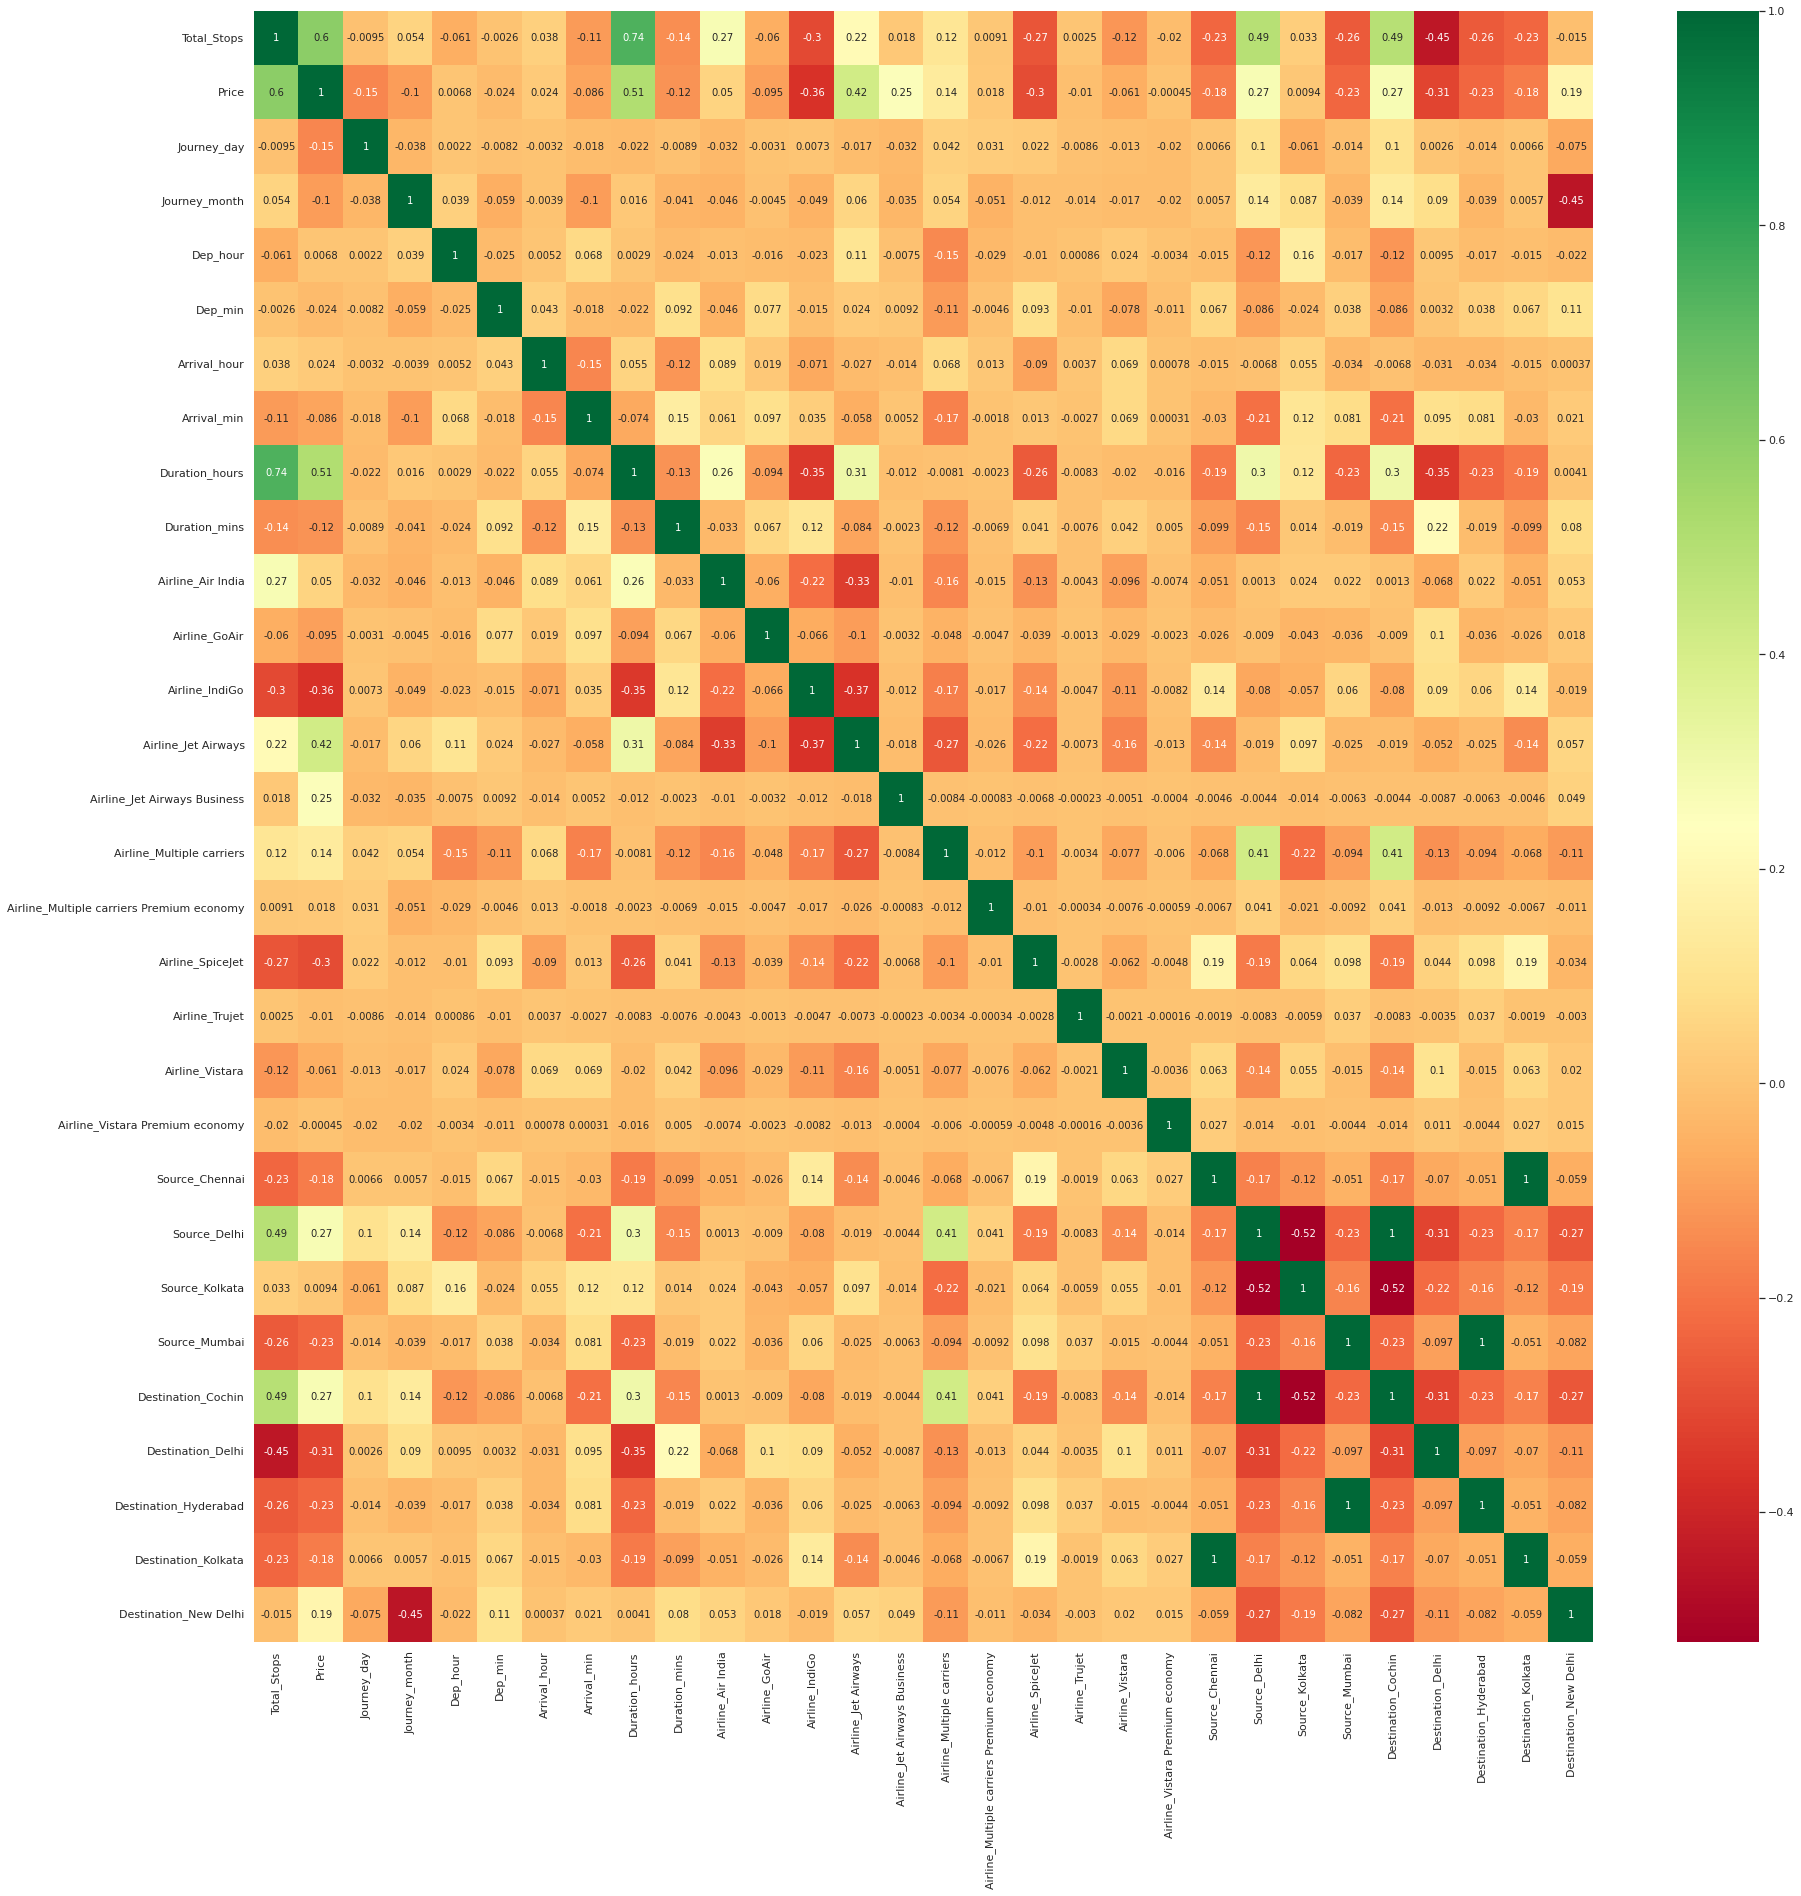

In [ ]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (30,30))
sns.heatmap(data_train.corr(), annot = True,cmap="RdYlGn")

plt.show()

evident from above heat map that price highly corelates with #total stops and #duration hours features which also has a logical validation

# Model-1 :- Linear Regression

Using Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
# linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))
linear_regressor.fit(X_train, y_train)
y_predict = linear_regressor.predict(X_test)

acc=r2_score(y_test,y_predict)

print(acc)

0.626392140224854


# Training 2 models with default Hyperparameters

In [ ]:
reg_rf = RandomForestRegressor()
xgboost_model = XGBRegressor()

Fitting the training data

In [ ]:
reg_rf.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

[05:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
print(data_train.columns)

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


Predicting the output on trained models

In [ ]:
y_pred_reg_rf = reg_rf.predict(X_test)
y_pred_xgboost = xgboost_model.predict(X_test)

R2_scores of both models on Test data

In [ ]:
from sklearn.metrics import r2_score

acc1 = r2_score(y_test,y_pred_reg_rf)
acc2 = r2_score(y_test,y_pred_xgboost)  

print(acc1)
print(acc2)

0.8040923899348895
0.7852421674260164


MAE, MSE, RMSE on both models 

In [ ]:
print('RandomForest')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_reg_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_reg_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg_rf)))

print('XGBoost')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgboost))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgboost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost)))

RandomForest
MAE: 1162.0287746954727
MSE: 3996696.7692688764
RMSE: 1999.1740217572046
XGBoost
MAE: 1505.4453780485203
MSE: 4381258.774676289
RMSE: 2093.1456649445804


# Model-2 :- Decision Tree


SKLearn implementation

In [ ]:
from sklearn.tree import DecisionTreeRegressor as DT

model = DT()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

acc = r2_score(y_test,y_pred)
print(acc)

0.6904309465479666


HyperParameter Tunning on Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

g_cv = GridSearchCV(DT(random_state=0),
              param_grid={'min_samples_split': range(2, 10), 'max_depth': range(3,12), 'min_samples_leaf': range(2,10), 'max_leaf_nodes':range(10,100,10), 'splitter': ["best","random"], 'max_features': ["auto","log2","sqrt",None]},
              cv=5, refit=True)

g_cv.fit(X_train, y_train)
g_cv.best_params_

result = g_cv.cv_results_
# print(result)
r2_score(y_test, g_cv.best_estimator_.predict(X_test))

0.7535642778169515

# Model-3 :- RandomForestRegressor

Using SKlearn 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf }

model = RandomForestRegressor(random_state=1)
g_search = RandomizedSearchCV(estimator = model,param_distributions = random_grid ,cv = 3, n_jobs = 1, verbose = 2, random_state=42, n_iter = 30)

g_search.fit(X_train, y_train)

print(g_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   3.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   3.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   3.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=6

Hyperparameter tunning

In [ ]:
model = RandomForestRegressor(n_estimators=2000,min_samples_split=5,min_samples_leaf=2,max_features='auto',max_depth=50,bootstrap=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

acc=r2_score(y_test,y_pred)

print(acc)

0.8188756378616731


# Model-4 :- LightGBM

Accuracy using default hyperparameters

In [ ]:
import lightgbm as ltb

model = ltb.LGBMRegressor()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

acc = r2_score(y_test,y_predict)

print(acc)

0.8272389681035308


Hyperparameter Tunning on LightGBM

In [ ]:
gridParams = {
    'learning_rate': [0.05,0.04,0.03,0.07,0.09],
    'num_leaves': range(30,200,5),
    'max_depth' : range(3,16),
    'colsample_bytree' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf' : range(3,15)
    }

grid = RandomizedSearchCV(ltb.LGBMRegressor(random_state=0),gridParams,verbose=1,cv=5,n_jobs = -1,n_iter=30)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=0), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7],
                                        'learning_rate': [0.05, 0.04, 0.03,
                                                          0.07, 0.09],
                                        'max_depth': range(3, 16),
                                        'min_data_in_leaf': range(3, 15),
                                        'min_split_gain': [0.01],
                                        'num_leaves': range(30, 200, 5)},
                   verbose=1)

In [ ]:
print(grid.best_params_)

{'num_leaves': 165, 'min_split_gain': 0.01, 'min_data_in_leaf': 4, 'max_depth': 13, 'learning_rate': 0.09, 'colsample_bytree': 0.7}


In [ ]:
clf = ltb.LGBMRegressor(min_split_gain=0.01,max_depth=13,learning_rate=0.09,colsample_bytree=0.7,num_leaves=165,min_data_in_leaf=4)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

acc2 = r2_score(y_test,y_pred)
print(acc2)

0.8450274816407303


# Model-5 :- XGBoostRegressor

In [ ]:
from xgboost import XGBRegressor 

xgboost_model = XGBRegressor()

params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30], 
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

xgb_model_tuned = RandomizedSearchCV(estimator = xgboost_model, param_distributions = params, scoring='neg_mean_squared_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb_model_tuned.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[19:54:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.8s
[19:54:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.8s
[19:54:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.9s
[19:54:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=30, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Accuracy using XGBoost after Hyperparameter tunning

In [ ]:
print(xgb_model_tuned.best_params_)
prediction = xgb_model_tuned.predict(X_test)

acc = r2_score(y_test,prediction)

print(acc)

{'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}
0.8469102137730239


# Model-6 :- SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

regressor = SVR(C=100,kernel='linear')
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
acc = r2_score(y_test,y_pred)
print(acc)

# y_pred = regressor.predict(X_test)


# # clf = SVR()
# # clf.fit(X_train,y_train)
# y_pred = regressor.predict(X_train)
# acc = r2_score(y_train,y_pred)

# print(acc)

# plt.scatter(X,y,color='red')

# plt.plot(x1,regressor.predict(x1))


0.5596074576707748


In [ ]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, random_state=0)
regr = make_pipeline(StandardScaler(),LinearSVR(random_state=0, tol=1e-5))
regr.fit(X, y)

# Model-7 :- Bagging Regressor

Using sklearn

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

regr = BaggingRegressor().fit(X_train, y_train)

y_pred = regr.predict(X_test)
acc = r2_score(y_test,y_pred)
print(acc)

0.7921050116047726


Hyper parameter tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gridParams = {
    'n_estimators': range(10,200,10),
    'max_features': range(10,29,1)
    }

grid = RandomizedSearchCV(BaggingRegressor(random_state=0),gridParams)
grid.fit(X_train,y_train)

print(grid.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

{'n_estimators': 140, 'max_features': 24}


In [ ]:
y_pred = grid.predict(X_test)
acc = r2_score(y_test,y_pred)
print(acc)

0.8153140110207061


# Aggregate

In [ ]:
from xgboost import XGBRegressor 
import lightgbm as ltb
from sklearn.ensemble import RandomForestRegressor


model1 = ltb.LGBMRegressor(n_estimators=300)
model2 = XGBRegressor(learning_rate=0.1, n_estimators=100)
model3 = RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=10,n_estimators=1000)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

y1 = model1.predict(X_test)
y2 = model2.predict(X_test)
y3 = model3.predict(X_test)

y=[]

for i in range(len(y_test)):
  u=[y1[i],y2[i],y3[i]]
  y.append(np.mean(u))

acc = r2_score(y_test,y)   
print(acc)

[17:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8429795540334873
